### **Colorado Graph Simulation**

This Jupyter notebook will demonstrate how to extract all nodes and edges from the Colorado county.csv dataset, along with visualizing toy models using networkx (nx).

In [1]:
# tested on python 3.11.2
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### **Finding Nodes and Edges**

Prior to representing a graph, we will access all nodes and edges from our Colorado dataset. Each node represents a county in Colorado, and edges exist between any two contiguous counties in Colorado.

In [19]:
"""
find_nodes function
Input:  Filepath (string) that leads to county.csv
Output: List containing all of Colorado's counties sorted in alphabetical order
"""
def find_nodes(input_path: str):
    
    """
    Use a hashset to track all of Colorado's counties w/out duplicates
    Hashsets have O(1) average lookup time.
    """
    seen = set()
    
    with open(input_path, "r") as input_file:
        
        # skip the header
        # if you don't do this, then you'll insert "County" as a node
        next(input_file, None)
        
        for line in input_file:
            try:
                
                """
                For each row, add each county (that's first listed) into
                the hashset. Since each pair [a, b] has a pair [b, a] in
                the CSV, we don't need to add both column values for each row.
                """
                row = line.split(",")
                seen.add(row[0])                
            
            # if something broke, print what went wrong
            except Exception as e:
                print(str(e))
    
    """
    Return a list in sorted order.
    Nodes and counties will be considered the same thing.
    """
    nodes = list(seen)
    nodes.sort()
    
    # O(nlogn) time for sorting counties, where n = number of counties
    # O(n) extra space for hashset and list
    return nodes

# run the function
# make sure that county.csv is in the SAME folder as this notebook!
input_path = "county.csv"
nodes = find_nodes(input_path)

In [20]:
# check if colorado has 64 counties
# if it doesn't, something went wrong!
# source: https://dola.colorado.gov/lgis/counties.jsf
len(nodes)

64

In [21]:
# check to see if the counties are in sorted order
nodes[:10]

['Adams',
 'Alamosa',
 'Arapahoe',
 'Archuleta',
 'Baca',
 'Bent',
 'Boulder',
 'Broomfield',
 'Chaffee',
 'Cheyenne']

Now that we've found all of Colorado's counties, let's assign key-value pairs.

- Key: County name
- Value: Position in alphabetically sorted list

In [18]:
# find all edges between any two nodes in the colorado dataset
def find_edges(input_path: str):
    
    with open(input_path, "r") as input_file:

        # write each row from the txt file to the csv
        for line in input_file:
            words = line.split(",")

            try:
                # put each time unit (excluding ms) in separate columns
                year, month, day = words[0].split("-")
                hour, minute, second = words[1].split(":")

                # convert them into integers
                year, month, day = int(year), int(month), int(day)
                hour, minute, second = int(hour), int(minute), int(second)

                # find the other rows with data
                magnitude = words[5]
                latitude = words[2]
                longitude = words[3]
                depth = words[4]

                # reformat the line
                data = [year, month, day, hour, minute, second,
                            magnitude, latitude, longitude, depth]
                csv_writer.writerow(data)
            
            except Exception as e:
                print(str(e))

# main method that calls the web scraper function
if __name__ == "__main__":
    input_path = "src/scrapers/Kyushu/Kyushu-Raw.csv"
    output_path = "src/scrapers/Kyushu/Kyushu-20040401-20130331.csv"
    find_quakes(input_path, output_path)


NameError: name 'find_quakes' is not defined

### **Creating the Graph**

In [ ]:
# Create a graph with 15 nodes and no edges
graph = nx.Graph()
graph.add_nodes_from(range(1,16))

# Manually add edges to the graph
edges_to_add = [(1, 2), (1, 3), (3, 4), (2, 4), (2, 5), (4, 5), (4, 6), (3, 6), (5, 12), (5, 13),  # Example edges
                (5, 7), (6, 7), (6, 8),(7,9), (8, 9),(9,10),(7,11), (7,12),
                (10, 11), (11, 12), (12, 13), (13, 14),(13,15),(11,15)
                ]  # Connecting the subgraphs

graph.add_edges_from(edges_to_add)


In [ ]:
# Partition the graph into three subgraphs
subgraph1_nodes = list(range(1, 6))
subgraph2_nodes = list(range(6, 11))
subgraph3_nodes = list(range(11, 16))

subgraph1 = graph.subgraph(subgraph1_nodes)
subgraph2 = graph.subgraph(subgraph2_nodes)
subgraph3 = graph.subgraph(subgraph3_nodes)

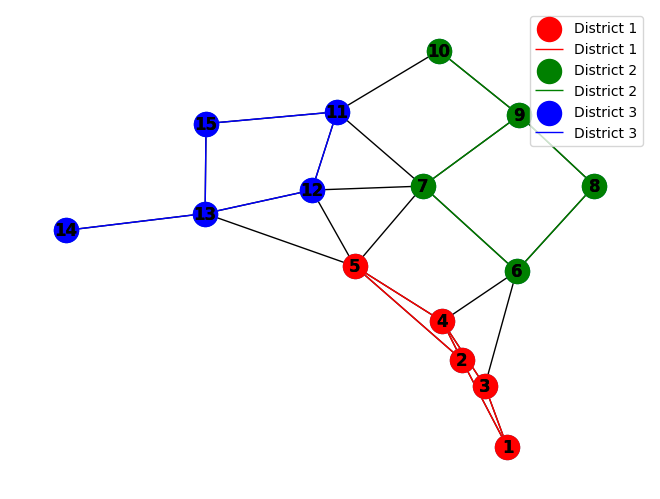

In [ ]:
pos = nx.spring_layout(graph)  # You can change the layout algorithm as needed

nx.draw(graph, pos, with_labels=True, font_weight='bold')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='District 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='District 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='District 3')


plt.legend()
plt.show()

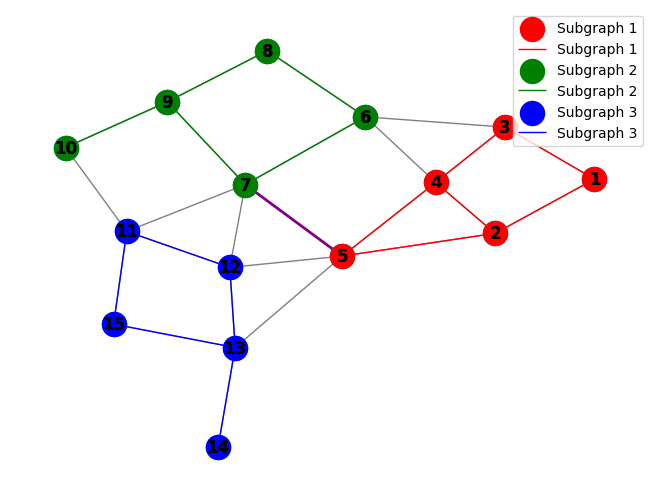

In [ ]:
# Highlight an edge between subgraphs
highlighted_edge = (5, 7)

# Visualize the entire graph with the highlighted edge
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, font_weight='bold', edge_color='gray')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='Subgraph 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='Subgraph 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='Subgraph 3')

# Highlight the specific edge
nx.draw_networkx_edges(graph, pos, edgelist=[highlighted_edge], edge_color='purple', width=2)

plt.legend()
plt.show()

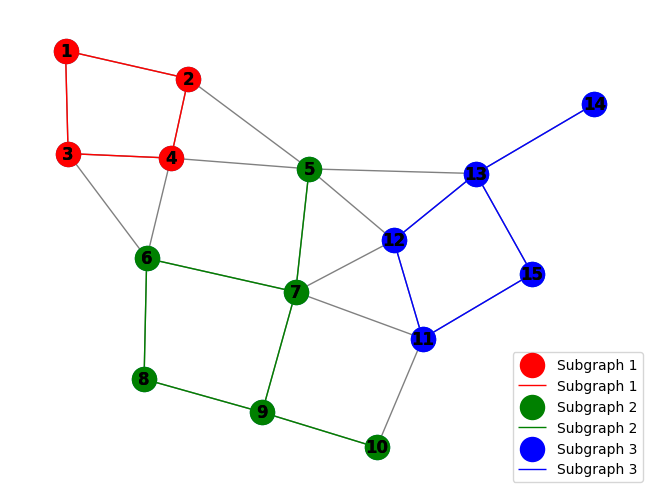

In [ ]:
# Switch node 5 to subgraph2
subgraph2_nodes.append(5)
subgraph1_nodes.remove(5)

# Update subgraphs
subgraph1 = graph.subgraph(subgraph1_nodes)
subgraph2 = graph.subgraph(subgraph2_nodes)

# Visualize the updated graph
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, font_weight='bold', edge_color='gray')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='Subgraph 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='Subgraph 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='Subgraph 3')

plt.legend()
plt.show()